In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('../analytic_stuff/python_Beklaryan/Machine_Learning_datasets/clustering.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(381, 13)

In [6]:
# Приводим к числовому виду
X = data
X['Gender'] = X['Gender'].map({"Male":0, "Female":1})
X['Married'] = X['Married'].map({"No":0, "Yes":1})
X['Education'] = X['Education'].map({"Not Graduate":0, "Graduate":1})
X['Self_Employed'] = X['Self_Employed'].map({"No":0, "Yes":1})
X['Loan_Status'] = X['Loan_Status'].map({"N":0, "Y":1})
X['Dependents'] = X['Dependents'].map({'0':0, '1':1, '2':2,'3+':3})
X['Dependents_0'] = X['Dependents'].apply(lambda x: 1 if x == 0 else 0)
X['Dependents_1'] = X['Dependents'].apply(lambda x: 1 if x == 1 else 0)
X['Dependents_2'] = X['Dependents'].apply(lambda x: 1 if x == 2 else 0)
X['Dependents_3'] = X['Dependents'].apply(lambda x: 1 if x == 3 else 0)
X['Property_Area'] = X['Property_Area'].map({"Rural":1, "Urban":2, "Semiurban":3})
X['Property_Area_Rural'] = X['Property_Area'].apply(lambda x: 1 if x == 1 else 0)
X['Property_Area_Urban'] = X['Property_Area'].apply(lambda x: 1 if x == 2 else 0)
X['Property_Area_Semiurban'] = X['Property_Area'].apply(lambda x: 1 if x == 3 else 0)
X = X.drop(['Dependents', 'Property_Area', 'Loan_Status', 'Loan_ID'], axis=1)
X = X.replace(np.nan, -1, regex=True)
# X.dropna(inplace=True)
X.shape

(381, 16)

In [7]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Urban,Property_Area_Semiurban
0,0.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,1,0,0
1,0.0,1,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1,0
2,0.0,1,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1,0
3,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,0
4,0.0,1,0,0.0,2333,1516.0,95.0,360.0,1.0,1,0,0,0,0,1,0


In [8]:
from sklearn.preprocessing import MinMaxScaler 
# Нормализуем данные
mms = MinMaxScaler()
mms.fit(X)
X_transformed = mms.transform(X)
X_transformed.shape


(381, 16)

In [9]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

#рисуем штучку, которая сокращает размерность

def plot_LSA(data, test_labels=[], colors=['orange','blue'], savepath="PCA_demo.csv", plot=True, ):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(data)
        lsa_scores = lsa.transform(data)
        if len(test_labels) > 0:
            color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
            color_column = [color_mapper[label] for label in test_labels]
            if plot:
                plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=mcolors.ListedColormap(colors))
        elif plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8)

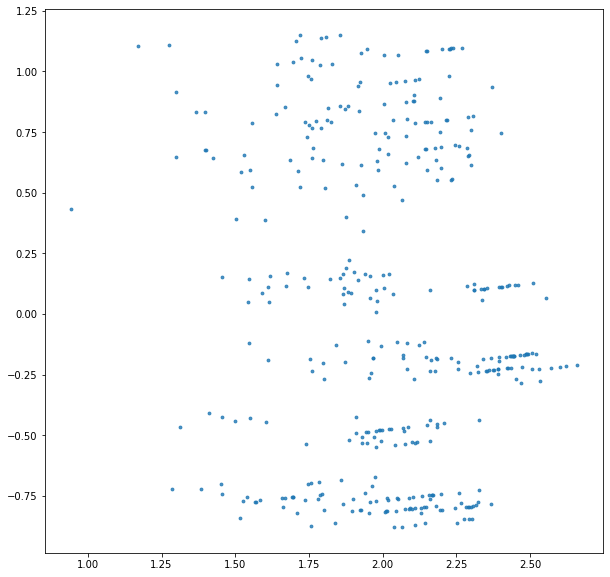

In [10]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_transformed)
plt.show()

Тут можно расмотреть 5 кластеров, если делить по оси y.

**KMeans**

In [11]:
#training k-means model
from sklearn.cluster import KMeans

sum_of_squared_distances_tr = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_transformed)
    sum_of_squared_distances_tr.append(km.inertia_)

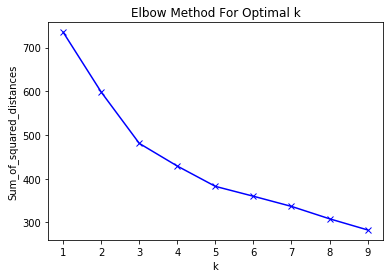

In [12]:
plt.plot(K, sum_of_squared_distances_tr, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

На картинке выше выход на плато идет на цифре 3, поэтому для KMeans попробую 3 кластера и 5.

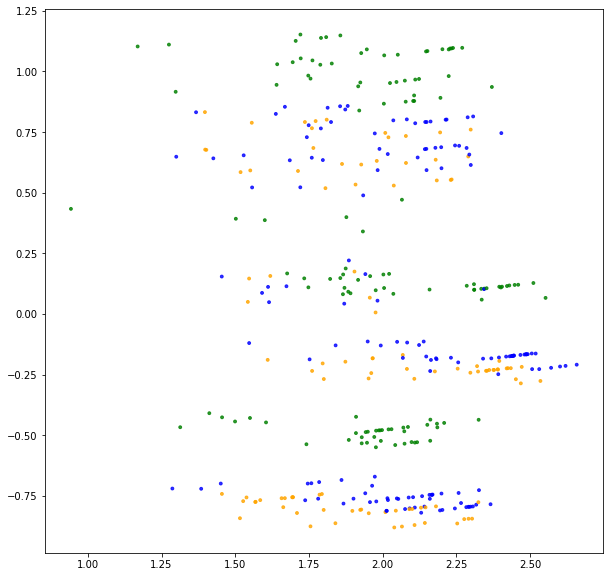

In [13]:
km_tr = KMeans(n_clusters=3)
km_tr = km_tr.fit(X_transformed)

#predictions from kmeans
pred_tr = km_tr.predict(X_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_LSA(X_transformed, pred_tr, ['orange','blue', 'green'])

Один кластер найден идеально, все остальное перемешано. Попробуем с пятью.

**GaussianMixture**

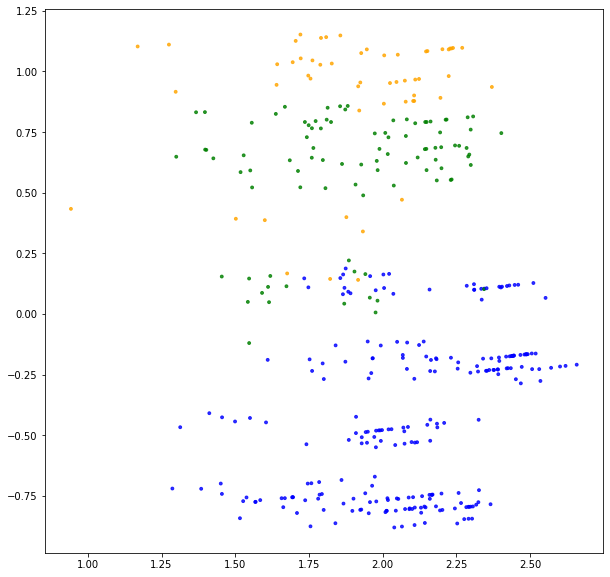

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,random_state=30)
gmm.fit(X_transformed)

#predictions from gmm
gmm_labels = gmm.predict(X_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_LSA(X_transformed, gmm_labels, ['orange','blue', 'green'])

Ну 3 нижних класса отделены, хоть и слиты в один. Это выглядит несколько лучше чем KMeans

**AgglomerativeClustering**

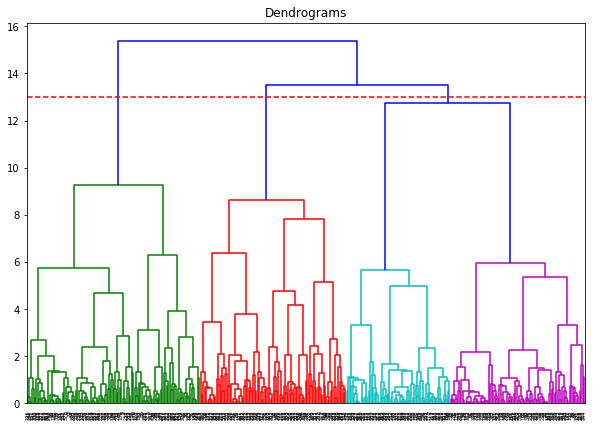

In [17]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_transformed, method='ward', metric='euclidean'))
plt.axhline(y=13, color='r', linestyle='--')

Вообще, здесь красивое разделение на 4  кластера. Линия, которую я провела для трех. Внизу сделаю разделение на 3, 4 и 2 кластера.

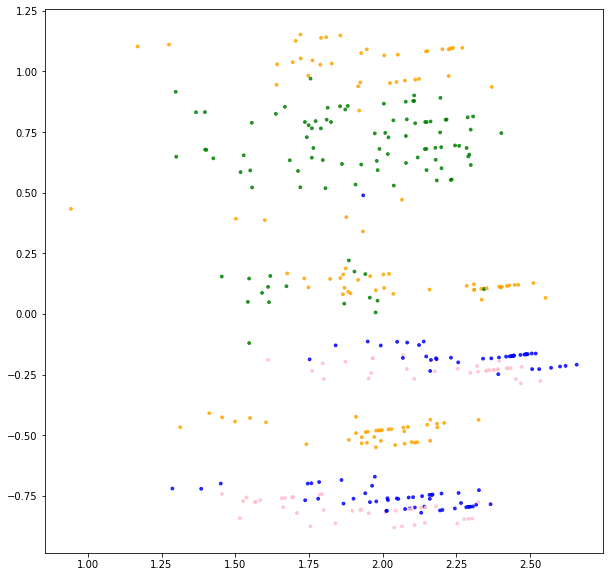

In [21]:
# Здесь на 4 делим
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_transformed)

#predictions from gmm
fig = plt.figure(figsize=(10, 10))        
plot_LSA(X_transformed, cluster.labels_, ['orange','blue', 'green', 'pink'])

Не многим лучше KMeans

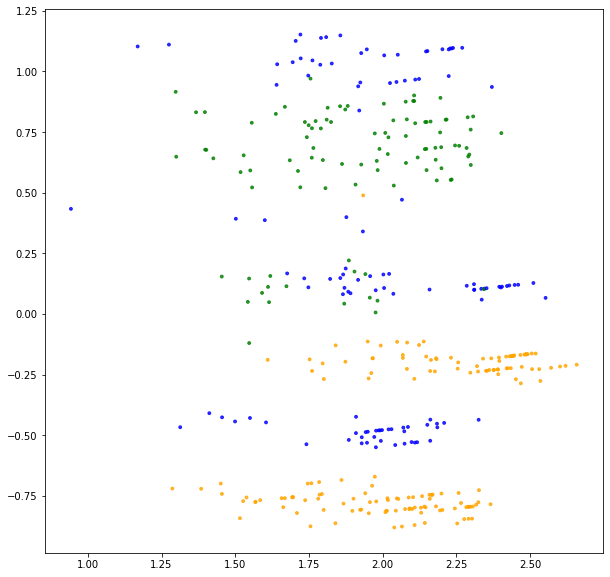

In [22]:
# Здесь на 3
cluster_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_3.fit_predict(X_transformed)

#predictions from gmm
fig = plt.figure(figsize=(10, 10))        
plot_LSA(X_transformed, cluster_3.labels_, ['orange','blue', 'green'])

А вот это уже намного лучше. Хотя бы 1 кластер четко сформирован.

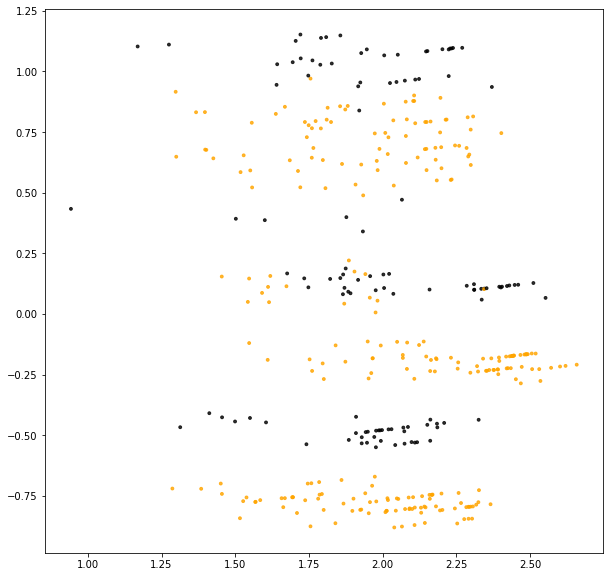

In [23]:
# Здесь на 2
cluster_3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_3.fit_predict(X_transformed)

#predictions from gmm
fig = plt.figure(figsize=(10, 10))        
plot_LSA(X_transformed, cluster_3.labels_, ['orange','blue', 'green', 'pink', 'black'])

Выглядит хорошо.

**DBSCAN**

In [24]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [25]:
#estimation of epsilon
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_transformed)
distances, indices = nbrs.kneighbors(X_transformed)

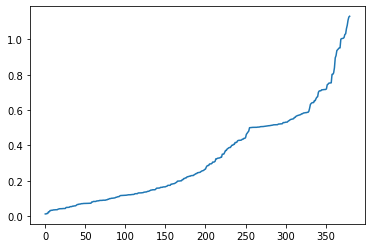

In [26]:
#the optimal value for epsilon will be found at the point of maximum curvature (in this case, 0.3)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [32]:
# Посмотрим на 5 кластеров
#train model, selecting 0.6 for eps and setting min_samples to 17
m = DBSCAN(eps=0.6, min_samples=17)
m.fit(X_transformed)
set(m.labels_)

{-1, 0, 1, 2, 3, 4}

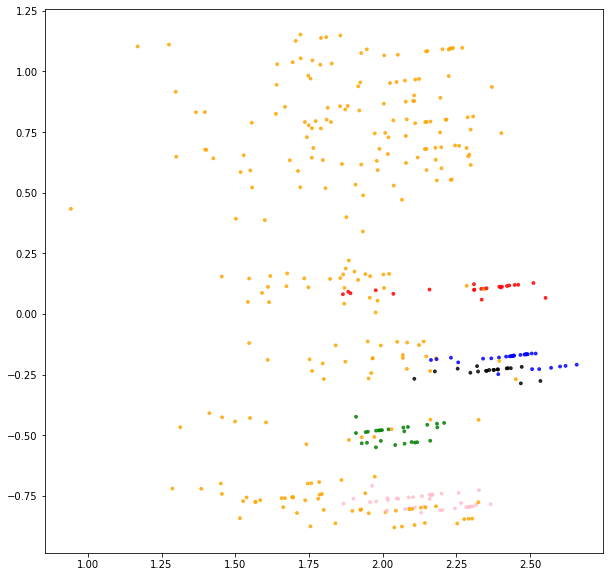

In [33]:
#predictions from gmm
fig = plt.figure(figsize=(10, 10))        
plot_LSA(X_transformed, m.labels_, ['orange','blue', 'green', 'pink', 'black', 'red'])

Вообще интересно, что найдены плотностные центры в общем-то правильно,но шума много.

In [34]:
# Посмотрим на 3 кластеров
#train model, selecting 0.6 for eps and setting min_samples to 20
m_3 = DBSCAN(eps=0.6, min_samples=20)
m_3.fit(X_transformed)
set(m_3.labels_)

{-1, 0, 1, 2}

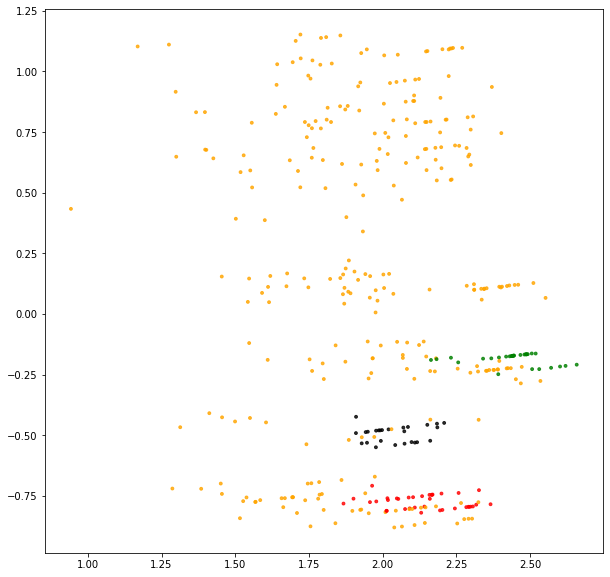

In [35]:
#predictions from gmm
fig = plt.figure(figsize=(10, 10))        
plot_LSA(X_transformed, m_3.labels_, ['orange','blue', 'green', 'pink', 'black', 'red'])

Тут то же самое, что и наверху

**Заключение**

Я бы рассмотрела внимательно возможность разбиения на 2 и 3 кластера с помощью иерархической кластеризации.